In [2]:
import math
import matplotlib.pyplot as plt



In [3]:
def f(t, T, k=0.07, T_room=20):
    return -k * (T - T_room)

In [4]:
def milne_method(t_values, y_values, h):
    n = len(t_values)
    if n < 4:
        raise ValueError("Need at least 4 starting points for Milne's method")
    f_values = [f(t_values[i], y_values[i]) for i in range(4)]
    y_pred = y_values[0] + (4*h/3) * (2*f_values[3] - f_values[2] + 2*f_values[1])
    f_pred = f(t_values[-1] + h, y_pred)
    y_corr = y_values[2] + (h/3) * (f_pred + 4*f_values[3] + f_values[2])
    return y_pred, y_corr


In [5]:

def exact_solution(t, k=0.07, T0=90, T_room=20):
    return T_room + (T0 - T_room) * math.exp(-k*t)


In [8]:
if __name__ == "__main__":
    h = 5
    t_values = [0, 5, 10, 15]
    y_values = [exact_solution(t) for t in t_values]

    y_pred, y_corr = milne_method(t_values, y_values, h)
    y_exact = exact_solution(20)

    t_values.append(20)
    y_values.append(y_corr)
    
    print("Results at t=20 min:")
    print(f"Predicted Temperature: {y_pred:.4f} °C")
    print(f"Corrected Temperature: {y_corr:.4f} °C")
    print(f"Exact Temperature    : {y_exact:.4f} °C")
    print(f"Error after correction: {abs(y_corr - y_exact):.6f} °C")

    t_exact = [i for i in range(0, 21)]
    y_exact_values = [exact_solution(t) for t in t_exact]


Results at t=20 min:
Predicted Temperature: 37.3196 °C
Corrected Temperature: 37.2536 °C
Exact Temperature    : 37.2618 °C
Error after correction: 0.008179 °C


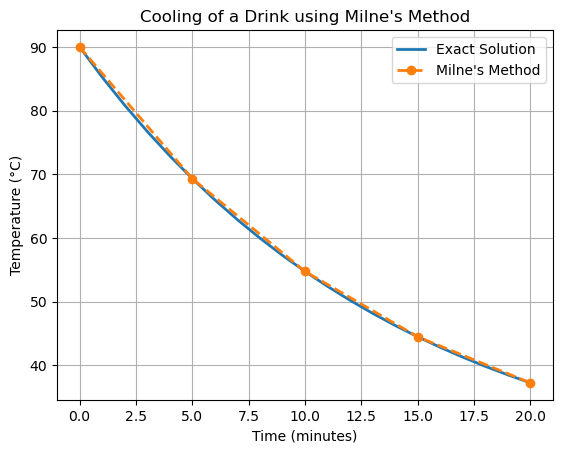

In [9]:
plt.plot(t_exact, y_exact_values, label="Exact Solution", linewidth=2)
plt.plot(t_values, y_values, 'o--', label="Milne's Method", linewidth=2)
plt.xlabel("Time (minutes)")
plt.ylabel("Temperature (°C)")
plt.title("Cooling of a Drink using Milne's Method")
plt.legend()
plt.grid(True)
plt.show()